In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [df, test_df]

In [ ]:
null_cols = combine[0].isnull().sum().where(combine[0].isnull().sum() > 0)[combine[0].isnull().sum().where(combine[0].isnull().sum() > 0) > 0] # there has to be a better way but im js like that 
null_cols

LotFrontage      259.0
Alley           1369.0
MasVnrType       872.0
MasVnrArea         8.0
BsmtQual          37.0
BsmtCond          37.0
BsmtExposure      38.0
BsmtFinType1      37.0
BsmtFinType2      38.0
Electrical         1.0
FireplaceQu      690.0
GarageType        81.0
GarageYrBlt       81.0
GarageFinish      81.0
GarageQual        81.0
GarageCond        81.0
PoolQC          1453.0
Fence           1179.0
MiscFeature     1406.0
dtype: float64

In [ ]:
# data cleaning
null_cols_80 = null_cols[null_cols > len(combine[0].index) * 0.8].index.values # re check how many %
null_cols_80 = [n.strip() for n in null_cols_80]
combine[0] = combine[0].drop(null_cols_80, axis=1)
combine[1] = combine[1].drop(null_cols_80, axis=1)
print(f'dropped columns: ', null_cols_80)

for i in range(len(combine)):
    combine[i]['LotFrontage'] = combine[i]['LotFrontage'].fillna(combine[0]['LotFrontage'].mean())
    combine[i]['MasVnrArea'] = combine[i]['MasVnrArea'].fillna(combine[0]['MasVnrArea'].mean())
    combine[i]['BsmtFinSF1'] = combine[i]['BsmtFinSF1'].fillna(combine[0]['BsmtFinSF1'].mean())
    combine[i]['BsmtFinSF2'] = combine[i]['BsmtFinSF2'].fillna(combine[0]['BsmtFinSF2'].mean())
    combine[i]['GarageYrBlt'] = combine[i]['GarageYrBlt'].fillna(combine[0]['GarageYrBlt'].median())
    combine[i]['Electrical'] = combine[i]['Electrical'].fillna(combine[0]['Electrical'].mode()[0])

dropped columns:  ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
combine[0].isnull().sum().where(combine[0].isnull().sum() > 0)[combine[0].isnull().sum().where(combine[0].isnull().sum() > 0) > 0] # there has to be a better way but im js like that 

MasVnrType      872.0
BsmtQual         37.0
BsmtCond         37.0
BsmtExposure     38.0
BsmtFinType1     37.0
BsmtFinType2     38.0
FireplaceQu     690.0
GarageType       81.0
GarageFinish     81.0
GarageQual       81.0
GarageCond       81.0
dtype: float64

In [ ]:
categorical_cols = combine[0].select_dtypes(include=['object', 'str'])
numerical_cols = combine[0].select_dtypes(include=['int', 'float']).columns.drop(['Id'])
to_scale_numerical_cols = numerical_cols.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath' ,'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',  'MoSold', 'YrSold', 'SalePrice'])

In [ ]:
MSSubClass_mapping = {
    20: 0,
    30: 1,
    40: 2,
    45: 3,
    50: 4,
    60: 5,
    70: 6,
    75: 7,
    80: 8,
    85: 9,
    90: 10,
    120: 11,
    150: 12,
    160: 13,
    180: 14,
    190: 15
}

Street_mapping = {
    "Grvl": 0,
    "Pave": 1
}

LandSlope_mapping = {
    "Sev": 0,
    "Mod": 1,
    "Gtl": 2
}

ExterQual_mapping = {
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
}

ExterCond_mapping = {
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
}

BsmtQual_mapping = {
    "NA": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

BsmtCond_mapping = {
    "NA": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

BsmtExposure_mapping = {
    "NA": 0,
    "No": 1,
    "Mn": 2,
    "Av": 3,
    "Gd": 4
}

BsmtFinType1_mapping = {
    "NA": 0,
    "Unf": 1,
    "LwQ": 2,
    "Rec": 3,
    "BLQ": 4,
    "ALQ": 5,
    "GLQ": 6
}

BsmtFinType2_mapping = BsmtFinType1_mapping.copy()

HeatingQC_mapping = {
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
}

CentralAir_mapping = {
    "N": 0,
    "Y": 1
}

KitchenQual_mapping = {
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
}

FireplaceQu_mapping = {
    "NA": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

GarageFinish_mapping = {
    "NA": 0,
    "Unf": 1,
    "RFn": 2,
    "Fin": 3
}

GarageQual_mapping = {
    "NA": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

GarageCond_mapping = {
    "NA": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

PavedDrive_mapping = {
    "N": 0,
    "P": 1,
    "Y": 2
}

mappings = {
    "MSSubClass": MSSubClass_mapping,
    "Street": Street_mapping,
    "LandSlope": LandSlope_mapping,
    "ExterQual": ExterQual_mapping,
    "ExterCond": ExterCond_mapping,
    "BsmtQual": BsmtQual_mapping,
    "BsmtCond": BsmtCond_mapping,
    "BsmtExposure": BsmtExposure_mapping,
    "BsmtFinType1": BsmtFinType1_mapping,
    "BsmtFinType2": BsmtFinType2_mapping,
    "HeatingQC": HeatingQC_mapping,
    "CentralAir": CentralAir_mapping,
    "KitchenQual": KitchenQual_mapping,
    "FireplaceQu": FireplaceQu_mapping,
    "GarageFinish": GarageFinish_mapping,
    "GarageQual": GarageQual_mapping,
    "GarageCond": GarageCond_mapping,
    "PavedDrive": PavedDrive_mapping,
}

print(combine[0].dtypes.value_counts())

for i in range(len(combine)):
    mapped_col = []
    for col, mapping in mappings.items():
        mapped_col.append(col)
        combine[i][col] = combine[i][col].map(mapping).fillna(0)

print(combine[0].dtypes.value_counts())
combine[0].isnull().sum().where(combine[0].isnull().sum() > 0)[combine[0].isnull().sum().where(combine[0].isnull().sum() > 0) > 0] # there has to be a better way but im js like that 

str        39
int64      35
float64     3
Name: count, dtype: int64
int64      43
str        22
float64    12
Name: count, dtype: int64


MasVnrType    872.0
GarageType     81.0
dtype: float64

In [ ]:
# one hot 
# df['Electrical'] = df['Electrical'].astype('str')

not_mapped = [item for item in categorical_cols if item not in mapped_col]

# print(combine[0].dtypes.value_counts())
# print(combine[1].dtypes.value_counts())
print(len(combine[0].columns))
print(len(combine[1].columns))

one_hot = pd.concat(combine, axis=0)

one_hot = pd.get_dummies(one_hot, columns=not_mapped, dtype='int')

combine[0] = one_hot.iloc[:len(combine[0]), :].copy()
combine[1] = one_hot.iloc[len(combine[0]):, :].copy()

# print(combine[0].dtypes.value_counts())
# print(combine[1].dtypes.value_counts())
print(len(combine[0].columns))
print(len(combine[1].columns))

77
76
223
223


In [ ]:
for dataset in combine:
    dataset['YearBuiltBand'] = pd.qcut(dataset['YearBuilt'], 4)

    dataset.loc[dataset['YearBuilt'] <= 1954, 'YearBuilt'] = 0
    dataset.loc[(dataset['YearBuilt'] > 1954) & (dataset['YearBuilt'] <= 1973), 'YearBuilt'] = 1
    dataset.loc[(dataset['YearBuilt'] > 1973) & (dataset['YearBuilt'] <= 2000), 'YearBuilt'] = 2
    dataset.loc[(dataset['YearBuilt'] > 2000) & (dataset['YearBuilt'] <= 2010), 'YearBuilt'] = 3
    dataset['YearBuilt'] = dataset['YearBuilt'].astype(int)

    dataset['YearRemodAddBand'] = pd.qcut(dataset['YearRemodAdd'], 4)

    dataset.loc[dataset['YearRemodAdd'] <= 1967, 'YearRemodAdd'] = 0
    dataset.loc[(dataset['YearRemodAdd'] > 1967) & (dataset['YearRemodAdd'] <= 1994), 'YearRemodAdd'] = 1
    dataset.loc[(dataset['YearRemodAdd'] > 1994) & (dataset['YearRemodAdd'] <= 2004), 'YearRemodAdd'] = 2
    dataset.loc[(dataset['YearRemodAdd'] > 2004) & (dataset['YearRemodAdd'] <= 2010), 'YearRemodAdd'] = 3
    dataset['YearRemodAdd'] = dataset['YearRemodAdd'].astype(int)

    dataset['GarageYrBltBand'] = pd.qcut(dataset['GarageYrBlt'], 4)

    dataset.loc[dataset['GarageYrBlt'] <= 1958, 'GarageYrBlt'] = 0
    dataset.loc[(dataset['GarageYrBlt'] > 1958) & (dataset['GarageYrBlt'] <= 1977), 'GarageYrBlt'] = 1
    dataset.loc[(dataset['GarageYrBlt'] > 1977) & (dataset['GarageYrBlt'] <= 2001), 'GarageYrBlt'] = 2
    dataset.loc[(dataset['GarageYrBlt'] > 2001) & (dataset['GarageYrBlt'] <= 2010), 'GarageYrBlt'] = 3
    dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(int)

    dataset.drop(['YearBuiltBand', 'YearRemodAddBand', 'GarageYrBltBand'], axis=1, inplace=True)

In [ ]:
# scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in range(len(combine)):
    combine[i][to_scale_numerical_cols] = scaler.fit_transform(combine[i][to_scale_numerical_cols])

In [ ]:
# combine[0].to_csv('tes.csv')

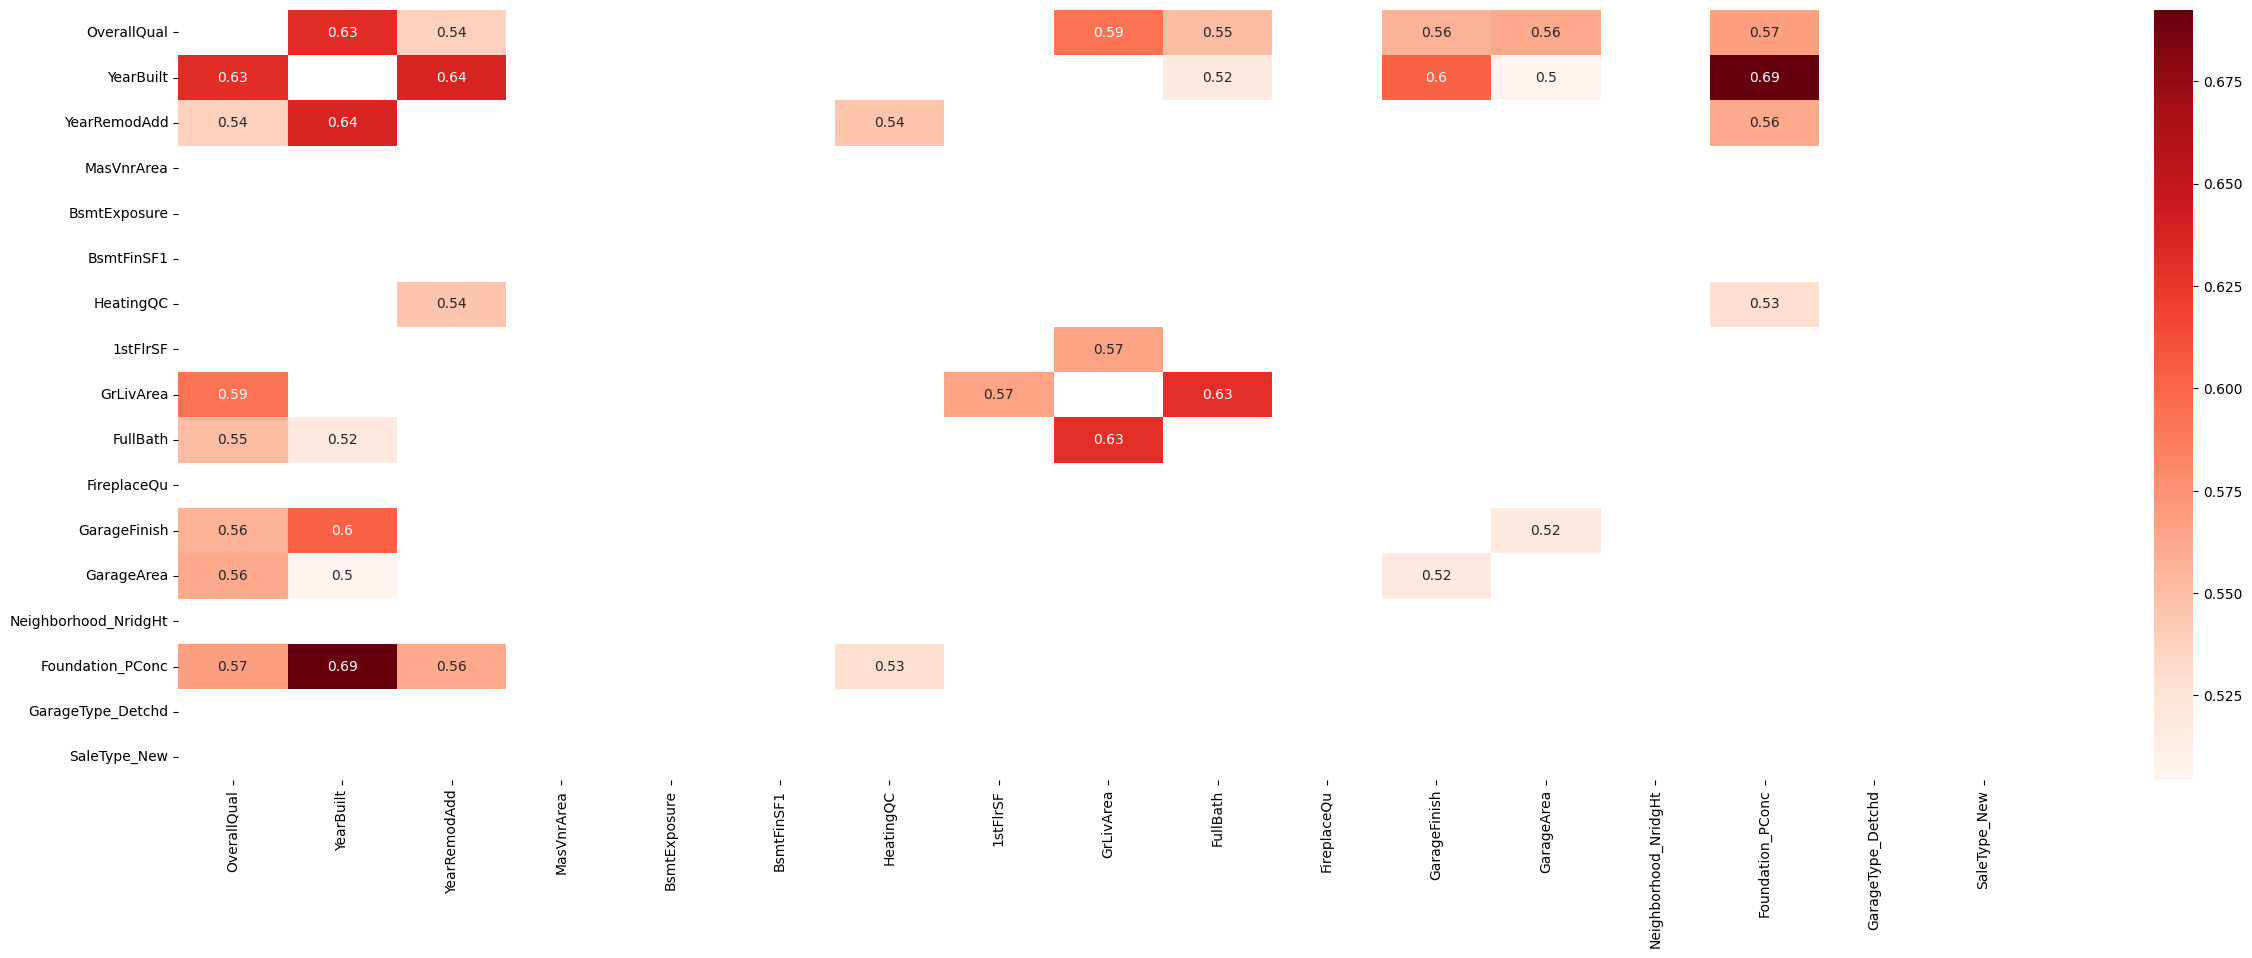

In [ ]:
# split
# X_train = combine[0].drop(['SalePrice', 'Id', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', 'ExterQual', 'BsmtQual', 'KitchenQual', 'YearBuilt', 'FullBath'], axis=1)
# y_train = combine[0]['SalePrice']

id = combine[1]['Id']
#X_test = combine[1].drop(['SalePrice', 'Id', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', 'ExterQual', 'BsmtQual', 'KitchenQual', 'YearBuilt', 'FullBath'], axis=1)
# y_test = combine[1]['SalePrice']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = combine[0].drop(columns=['SalePrice', 'Id'])
y = combine[0]['SalePrice']

selector = SelectKBest(f_regression, k=25)
selector.fit_transform(X, y)

support = selector.get_support(indices=True) 
# support = [combine[0].columns.values.tolist()[i] for i in support]
support = X.columns[selector.get_support()].tolist()

new_df = X[support].drop(columns=['Fireplaces', 'GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', 'ExterQual', 'BsmtQual', 'KitchenQual'])
corr_matrix = new_df.corr().abs()

# change this value as needed, if 0.5 does not work for your scenario
threshold = 0.5

filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 

plt.figure(figsize=(30,10))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()


                 feature       VIF
8           GarageFinish  5.685749
0           YearRemodAdd  4.477751
5               1stFlrSF  3.823275
4            TotalBsmtSF  3.738171
2           BsmtExposure  3.542290
11      Foundation_PConc  3.201474
7             Fireplaces  2.577312
6              GrLivArea  1.899893
9             GarageArea  1.678840
3             BsmtFinSF1  1.516797
13          SaleType_New  1.436353
1             MasVnrArea  1.349221
12     GarageType_Detchd  1.348883
10  Neighborhood_NridgHt  1.323356


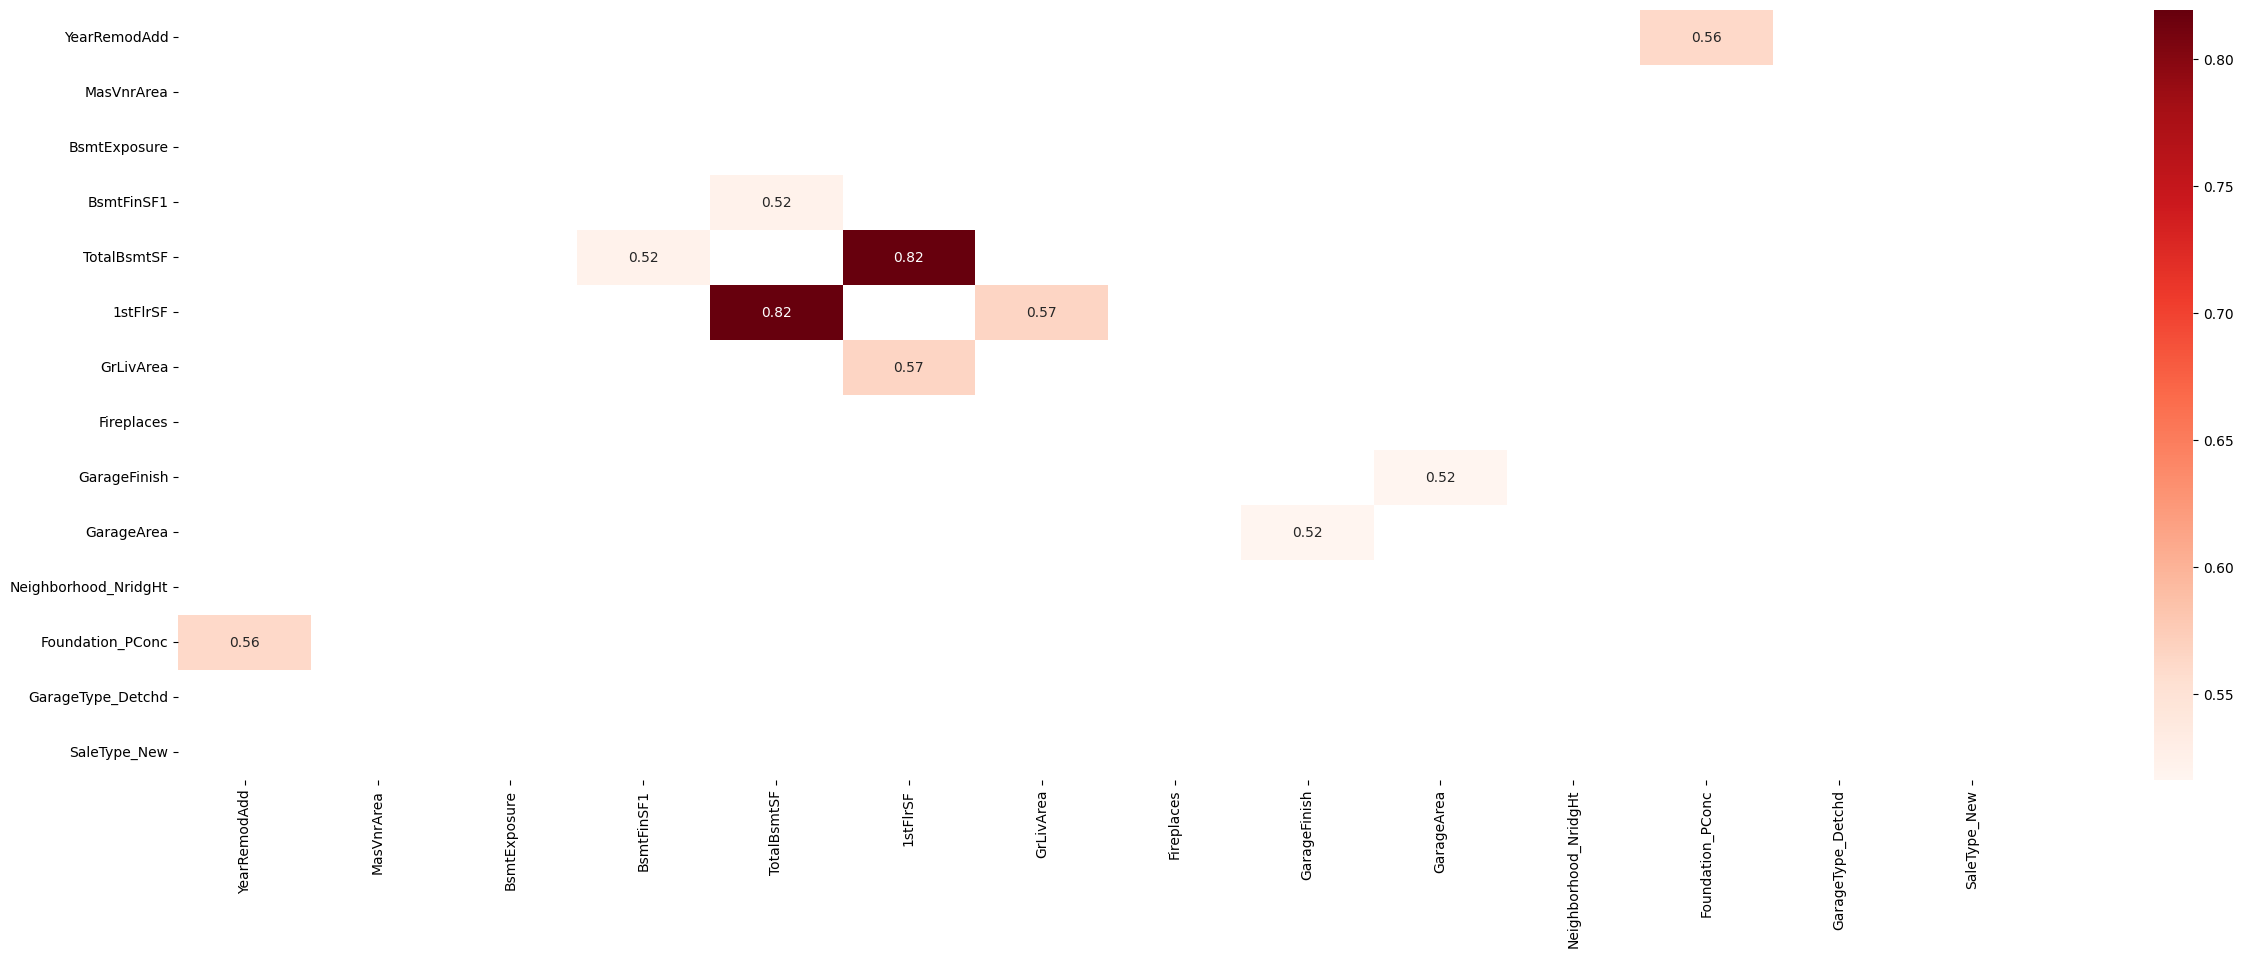

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[support].copy()
vif_data.drop(columns=['BsmtQual', 'KitchenQual', 'ExterQual', 'OverallQual', 'GarageCars', 'TotRmsAbvGrd', 'YearBuilt', 'HeatingQC', 'FireplaceQu', 'FullBath', 'GarageYrBlt'], inplace=True)
# vif_data.drop(columns=['2ndFlrSF', 'GrLivArea'], inplace=True)
vifed = vif_data.columns

vif = pd.DataFrame()
vif['feature'] = vif_data.columns

vif["VIF"] = [variance_inflation_factor(vif_data.values, i)
                          for i in range(len(vif_data.columns))]

# OverallQual
print(vif.sort_values(by='VIF', ascending=False))

corr_matrix = vif_data.corr().abs()

# change this value as needed, if 0.5 does not work for your scenario
threshold = 0.5

filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 

plt.figure(figsize=(30,10))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()


In [ ]:
#y_train = combine[0]['SalePrice']
# X_train = X[support].drop(columns=['Fireplaces', 'GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', 'ExterQual', 'BsmtQual', 'KitchenQual'])
# X_test = combine[1][support].drop(columns=['Fireplaces', 'GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', 'ExterQual', 'BsmtQual', 'KitchenQual'])
X_train = X[vifed]
X_test = combine[1][vifed]

# X_train = combine[0][support]
y_train = combine[0]['SalePrice']

# X_test = combine[1][support]

train_cols = X_train.columns.values.tolist()
test_cols = X_test.columns.values.tolist()

diff = set(train_cols) - set(test_cols)
print(diff)

X_train.drop(columns=diff, inplace=True)

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

set()


In [ ]:
#y_train.info()
y_train.info()

<class 'pandas.Series'>
Index: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [ ]:
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

preds = rf.predict(X_test)

submission = pd.DataFrame({
    "Id": id,
    "SalePrice": preds
})

submission.to_csv(f'submission/k{X_train.shape[1]}rf.csv', index=False)

In [ ]:
from xgboost import XGBRegressor

# xgb = XGBRegressor(n_estimators=100, max_depth=7)
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

submission = pd.DataFrame({
    "Id": id,
    "SalePrice": xgb_preds
})

submission.to_csv(f'submission/k{X_train.shape[1]}xgb.csv', index=False)

In [ ]:
print(X_train.info())
print(X_test.info())

train_cols = X_train.columns.values.tolist()
test_cols = X_test.columns.values.tolist()

diff = set(train_cols) - set(test_cols)
print(diff)
print(X_train.shape)

<class 'pandas.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YearRemodAdd          1460 non-null   int64  
 1   MasVnrArea            1460 non-null   float64
 2   BsmtExposure          1460 non-null   float64
 3   BsmtFinSF1            1460 non-null   float64
 4   TotalBsmtSF           1460 non-null   float64
 5   1stFlrSF              1460 non-null   float64
 6   GrLivArea             1460 non-null   float64
 7   Fireplaces            1460 non-null   int64  
 8   GarageFinish          1460 non-null   float64
 9   GarageArea            1460 non-null   float64
 10  Neighborhood_NridgHt  1460 non-null   int64  
 11  Foundation_PConc      1460 non-null   int64  
 12  GarageType_Detchd     1460 non-null   int64  
 13  SaleType_New          1460 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 171.1 KB
None
<class 'pandas.DataFrame'>
Index: 14